In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the csv file

data1 = pd.read_csv('/data/notebook_files/matala2_cosmetics_2019-Nov.csv')

# # Print it out if you want
data1

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02,view,5802432,1487580009286590000,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09,cart,5844397,1487580006317030000,NaN,NaN,2.38 sale,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10,view,5837166,1783999064103190000,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11,cart,5876812,1487580010100290000,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483040000,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
1048570,2019-11-08 11:17:27,remove_from_cart,5888061,1487580013086630000,NaN,shik,5.71,568919150,e2588ec8-e3ac-452f-9d14-c679879c6679
1048571,2019-11-08 11:17:27,view,5843812,1487580011534740000,NaN,NaN,2.78,410153810,b9c05605-bdfc-47a1-8742-120c989b99e6
1048572,2019-11-08 11:17:27,cart,5875273,1487580005553660000,NaN,NaN,7.46,402986169,dd9d10cd-9993-9ca3-5828-afb8abec851d
1048573,2019-11-08 11:17:28,view,5854812,1602943681873050000,NaN,grattol,5.24,568926108,6b3c6855-efea-4c02-9da6-e7c5a988628a


In [3]:
# data = data1.iloc[0:2000,:]

In [4]:
data_copy=data1.copy()

# **1**

In [5]:

# Convert 'event_time' column to datetime format
data_copy['event_time'] = pd.to_datetime(data_copy['event_time'])

# Sort the data by 'user_session' and 'event_time'
data_copy.sort_values(["user_id",'user_session', 'event_time'], inplace=True)

# Create a new column 'next_event_time' with the event_time of the next event in the same session
data_copy['next_event_time'] = data_copy.groupby('user_session')['event_time'].shift(-1)

# Calculate the duration between the current event and the next event in the same session
data_copy['duration_to_next_event'] = (data_copy['next_event_time'] - data_copy['event_time']).dt.total_seconds()

# Replace the NaN values in 'duration_to_next_event' with 0 for the last event in each session
data_copy['duration_to_next_event'].fillna(0, inplace=True)

# Drop the 'next_event_time' column
data_copy.drop('next_event_time', axis=1, inplace=True)

In [6]:

data_copy

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0
...,...,...,...,...,...,...,...,...,...,...
1048392,2019-11-08 11:16:28,view,5861591,1487580009143990000,NaN,lador,2.22,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,0.0
1048385,2019-11-08 11:16:23,view,5799891,1487580009051710000,NaN,NaN,19.03,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,0.0
1048471,2019-11-08 11:16:55,view,5881598,2151191071051210000,NaN,lovely,12.56,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,0.0
1048462,2019-11-08 11:16:53,view,5876382,1487580008246410000,NaN,NaN,23.81,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,0.0


# **2**

In [7]:

data_copy['event_time']= pd.to_datetime(data_copy['event_time'])

# Add a column with the cumulative sum of days since the last visit for each user
data_copy['days_since_last_visit'] = data_copy.groupby('user_id')['event_time'].diff().dt.days

data_copy['new_funnel'] = (data_copy['days_since_last_visit'] > 5) | (data_copy['days_since_last_visit'].isnull())

# Add a column with the funnel number for each user
data_copy['funnel_number'] = data_copy.groupby('user_id')['new_funnel'].cumsum()

In [8]:
data_copy

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,days_since_last_visit,new_funnel,funnel_number
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,NaN,True,1
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0,NaN,True,1
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0,0.0,False,1
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,0.0,False,1
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,0.0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048392,2019-11-08 11:16:28,view,5861591,1487580009143990000,NaN,lador,2.22,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,0.0,NaN,True,1
1048385,2019-11-08 11:16:23,view,5799891,1487580009051710000,NaN,NaN,19.03,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,0.0,NaN,True,1
1048471,2019-11-08 11:16:55,view,5881598,2151191071051210000,NaN,lovely,12.56,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,0.0,NaN,True,1
1048462,2019-11-08 11:16:53,view,5876382,1487580008246410000,NaN,NaN,23.81,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,0.0,NaN,True,1


# 3

In [9]:
data_copy['index_in_funnel'] = data_copy.groupby(['user_id', 'funnel_number'])['user_session'].transform(lambda x: x.factorize()[0] + 1)

In [10]:
data_copy

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,days_since_last_visit,new_funnel,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,NaN,True,1,1
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0,NaN,True,1,1
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0,0.0,False,1,1
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,0.0,False,1,1
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,0.0,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048392,2019-11-08 11:16:28,view,5861591,1487580009143990000,NaN,lador,2.22,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,0.0,NaN,True,1,1
1048385,2019-11-08 11:16:23,view,5799891,1487580009051710000,NaN,NaN,19.03,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,0.0,NaN,True,1,1
1048471,2019-11-08 11:16:55,view,5881598,2151191071051210000,NaN,lovely,12.56,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,0.0,NaN,True,1,1
1048462,2019-11-08 11:16:53,view,5876382,1487580008246410000,NaN,NaN,23.81,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,0.0,NaN,True,1,1


# 4

In [11]:
import re

def replace_value(value):
  
    return (re.findall('\d+\.?\d*', str(value)))
    

In [12]:
list_c= ["44 sale", "net 5.44"]
for i in list_c:
    print(replace_value(i))

['44']
['5.44']


In [13]:
data_copy['price'] = data_copy['price'].apply(replace_value)

# 5

<AxesSubplot:xlabel='event_type'>

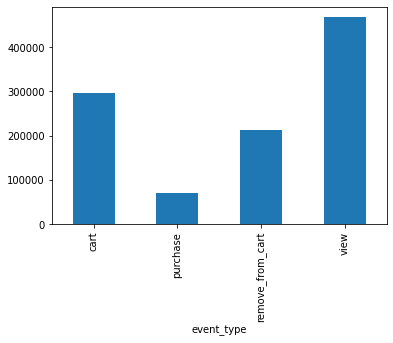

In [14]:
event_type_count= data_copy.groupby("event_type")["user_id"].count()

#create bar plot by group
event_type_count.plot(kind='bar')

# 6

In [18]:
# Group the data by user_id and user_session
grouped_data = data_copy.groupby(['user_id', 'user_session'])

# Calculate the number of events per session
events_per_session = grouped_data.size()

# Calculate the duration of each session
session_durations = grouped_data['event_time'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Get a list of viewed, added to cart, and purchased products per session
viewed_per_session = grouped_data.apply(lambda x: x.loc[x['event_type'] == 'view', 'product_id'].tolist())
added_to_cart_per_session = grouped_data.apply(lambda x: x.loc[x['event_type'] == 'cart', 'product_id'].tolist())
purchased_per_session = grouped_data.apply(lambda x: x.loc[x['event_type'] == 'purchase', 'product_id'].tolist())

# Create the session_data dataframe
session_data = pd.DataFrame({
    'user_id': events_per_session.index.get_level_values('user_id'),
    'user_session': events_per_session.index.get_level_values('user_session'),
    'total_events': events_per_session.values,
    'duration': session_durations.values,
    'list_of_viewed': viewed_per_session.values,
    'list_of_added_to_cart': added_to_cart_per_session.values,
    'list_of_purchased': purchased_per_session.values
})

In [19]:
session_data

,user_id,user_session,total_events,duration,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,0.0,[5240],[],[]
1,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,4,176.0,[],"[5614842, 5766379]","[5766379, 5614842]"
2,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,3,133.0,"[5713294, 5713295, 5713294]",[],[]
3,11274156,0c778a88-4700-4e8b-becb-3371ec28ea79,2,20.0,[5899834],[5809910],[]
4,11274156,7bcf0afd-33ab-49ca-bd55-9c11a817b3d2,1,0.0,[5649179],[],[]
...,...,...,...,...,...,...,...
210578,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,1,0.0,[5861591],[],[]
210579,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,1,0.0,[5799891],[],[]
210580,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,1,0.0,[5881598],[],[]
210581,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,1,0.0,[5876382],[],[]


In [20]:
# merge session_data with data_copy
merged_data = pd.merge(session_data, data_copy[["user_id",'user_session', 'funnel_number', 'index_in_funnel']], on=["user_id",'user_session'], how='left')

# select columns
finalsession_data = merged_data[["user_id",'user_session', 'total_events', 'duration', 'list_of_viewed', 'list_of_added_to_cart', 'list_of_purchased', 'funnel_number', 'index_in_funnel']]

In [21]:
finalsession_data

,user_id,user_session,total_events,duration,list_of_viewed,list_of_added_to_cart,list_of_purchased,funnel_number,index_in_funnel
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,0.0,[5240],[],[],1,1
1,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,4,176.0,[],"[5614842, 5766379]","[5766379, 5614842]",1,1
2,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,4,176.0,[],"[5614842, 5766379]","[5766379, 5614842]",1,1
3,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,4,176.0,[],"[5614842, 5766379]","[5766379, 5614842]",1,1
4,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,4,176.0,[],"[5614842, 5766379]","[5766379, 5614842]",1,1
...,...,...,...,...,...,...,...,...,...
1048352,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,1,0.0,[5861591],[],[],1,1
1048353,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,1,0.0,[5799891],[],[],1,1
1048354,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,1,0.0,[5881598],[],[],1,1
1048355,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,1,0.0,[5876382],[],[],1,1
